# Prompt Generation

In [17]:
answ_eval_ROLE = """
You are a helpful assistant responsible for grading two answers to a question that are provided by two different people.
"""

answ_eval_ASSESSMENT = """
Your assessment should include two parts:
- Winner: either 1 (if Answer 1 is better) and 2 (if Answer 2 is better) or 0 if they are fundamentally similar \
  and the differences are immaterial.
- Reasoning: a short explanation of why you chose the winner with respect to the measure described above.
"""

answ_eval_FORMAT = """
Format your response as a JSON object with the following structure:
{{
 "winner": <1, 2, or 0>,
 "reasoning": "Answer 1 is better because <your reasoning>."
}}
"""

In [25]:
import json

with open('/content/drive/MyDrive/workshop-ECAI/answer_evaluation/criteria2.json', 'r') as f:
  CRITERIA = json.load(f)

In [26]:
CRITERIA

{'comprehensiveness': 'To what extent does the answer fully and accurately address all relevant aspects of the question?     A comprehensive answer should be complete, well-organized, and free from redundancy or irrelevant details. For instance,     if asked about the pros and cons of nuclear energy, a good answer should include both advantages (e.g., efficiency, low     emissions) and disadvantages (e.g., waste, safety risks).',
 'diversity': 'How well does the answer present a range of perspectives, insights, or sources on the topic? A diverse answer     should explore multiple dimensions of the question and avoid being one-sided or relying on a single source. For example, a     question about climate change should include various causes, effects, and viewpoints (e.g., scientific, social, economic).',
 'directness': "How clearly and specifically does the answer respond to the question? A direct answer should be concise and     to the point, avoiding irrelevant information or vague la

## Questions Retrieval from files

In [2]:
import pandas as pd

question_df = pd.read_pickle('/content/drive/MyDrive/workshop-ECAI/questions_files/community_questions_dataframe_v4.pkl')
question_df

Community   USER                                   USER Description  \
0     community1  User1  A researcher in nutrigenetics, interested in u...   
1     community1  User1  A researcher in nutrigenetics, interested in u...   
2     community1  User1  A researcher in nutrigenetics, interested in u...   
3     community1  User1  A researcher in nutrigenetics, interested in u...   
4     community1  User1  A researcher in nutrigenetics, interested in u...   
..           ...    ...                                                ...   
145  community10  User3  A customer interested in personalized nutritio...   
146  community10  User3  A customer interested in personalized nutritio...   
147  community10  User3  A customer interested in personalized nutritio...   
148  community10  User3  A customer interested in personalized nutritio...   
149  community10  User3  A customer interested in personalized nutritio...   

      TASK                                   TASK Description  \
0    Task1  Investigating the impact of genetic variants o...   
1    Task2            Exploring gene-disease interactions\n     
2    Task3  Analyzing nutritional impact on gene expressio...   
3    Task4       Investigating metabolic pathway insights\n     
4    Task5  Examining environmental and nutrient modulatio...   
..     ...                                                ...   
145  Task1     Understanding personal genetic information\n     
146  Task2                 Exploring dietary implications\n     
147  Task3           Investigating gene-diet interactions\n     
148  Task4      Understanding disease risk and prevention\n     
149  Task5            Exploring nutrigenetic applications\n     

                                             Questions  \
0    [Q1. How do genetic variants in metabolic path...   
1    [Q1. What is the relationship between genetic ...   
2    [Q1. How do specific nutrients or dietary patt...   
3    [Q1. What role do metabolic pathways play in m...   
4    [Q1. How do environmental factors, such as lif...   
..                                                 ...   
145  [Q1. What do my genetic test results reveal ab...   
146  [Q1. What dietary patterns or nutrients can he...   
147  [Q1. How do genetic variants influence my resp...   
148  [Q1. What are the implications of my genetic t...   
149  [Q1. What are the potential applications of nu...   

                                    File  
0     community1_generated_question3.txt  
1     community1_generated_question3.txt  
2     community1_generated_question3.txt  
3     community1_generated_question3.txt  
4     community1_generated_question3.txt  
..                                   ...  
145  community10_generated_question3.txt  
146  community10_generated_question3.txt  
147  community10_generated_question3.txt  
148  community10_generated_question3.txt  
149  community10_generated_question3.txt  

[150 rows x 7 columns]

In [13]:
import re

def clean_question_list(q_list):
    return [re.sub(r"Q\d+\.\s*", "", q).strip() for q in q_list]

question_df["Cleaned Questions"] = question_df["Questions"].apply(clean_question_list)

question_df

Community   USER                                   USER Description  \
0     community1  User1  A researcher in nutrigenetics, interested in u...   
1     community1  User1  A researcher in nutrigenetics, interested in u...   
2     community1  User1  A researcher in nutrigenetics, interested in u...   
3     community1  User1  A researcher in nutrigenetics, interested in u...   
4     community1  User1  A researcher in nutrigenetics, interested in u...   
..           ...    ...                                                ...   
145  community10  User3  A customer interested in personalized nutritio...   
146  community10  User3  A customer interested in personalized nutritio...   
147  community10  User3  A customer interested in personalized nutritio...   
148  community10  User3  A customer interested in personalized nutritio...   
149  community10  User3  A customer interested in personalized nutritio...   

      TASK                                   TASK Description  \
0    Task1  Investigating the impact of genetic variants o...   
1    Task2            Exploring gene-disease interactions\n     
2    Task3  Analyzing nutritional impact on gene expressio...   
3    Task4       Investigating metabolic pathway insights\n     
4    Task5  Examining environmental and nutrient modulatio...   
..     ...                                                ...   
145  Task1     Understanding personal genetic information\n     
146  Task2                 Exploring dietary implications\n     
147  Task3           Investigating gene-diet interactions\n     
148  Task4      Understanding disease risk and prevention\n     
149  Task5            Exploring nutrigenetic applications\n     

                                             Questions  \
0    [Q1. How do genetic variants in metabolic path...   
1    [Q1. What is the relationship between genetic ...   
2    [Q1. How do specific nutrients or dietary patt...   
3    [Q1. What role do metabolic pathways play in m...   
4    [Q1. How do environmental factors, such as lif...   
..                                                 ...   
145  [Q1. What do my genetic test results reveal ab...   
146  [Q1. What dietary patterns or nutrients can he...   
147  [Q1. How do genetic variants influence my resp...   
148  [Q1. What are the implications of my genetic t...   
149  [Q1. What are the potential applications of nu...   

                                    File  \
0     community1_generated_question3.txt   
1     community1_generated_question3.txt   
2     community1_generated_question3.txt   
3     community1_generated_question3.txt   
4     community1_generated_question3.txt   
..                                   ...   
145  community10_generated_question3.txt   
146  community10_generated_question3.txt   
147  community10_generated_question3.txt   
148  community10_generated_question3.txt   
149  community10_generated_question3.txt   

                                     Cleaned Questions  
0    [How do genetic variants in metabolic pathway ...  
1    [What is the relationship between genetic vari...  
2    [How do specific nutrients or dietary patterns...  
3    [What role do metabolic pathways play in media...  
4    [How do environmental factors, such as lifesty...  
..                                                 ...  
145  [What do my genetic test results reveal about ...  
146  [What dietary patterns or nutrients can help m...  
147  [How do genetic variants influence my response...  
148  [What are the implications of my genetic test ...  
149  [What are the potential applications of nutrig...  

[150 rows x 8 columns]

In [14]:
question_df["Cleaned Questions"][0]

['How do genetic variants in metabolic pathway genes influence the response to dietary interventions aimed at weight management?',
 'What is the role of transcriptomics in understanding the effects of nutrient-gene interactions on metabolic health?',
 'How do dietary patterns modulate the expression of genes involved in inflammation, and what are the implications for disease risk?',
 'Can specific genetic variants predict responsiveness to nutritional interventions targeting cardiovascular health?',
 'How do environmental factors, such as lifestyle, interact with genetic predispositions to affect nutrient metabolism and disease susceptibility?']

# Answer retrieval from file

In [27]:
import pandas as pd

answer_df = pd.read_csv("/content/drive/MyDrive/workshop-ECAI/answer_evaluation/answers_cache_gemma2_all-mpnet-base-v2.csv")
answer_df

Unnamed: 0   User                                               Task  \
0            0  User1  Investigating the impact of genetic variants o...   
1            1  User1  Investigating the impact of genetic variants o...   
2            2  User1  Investigating the impact of genetic variants o...   
3            3  User1  Investigating the impact of genetic variants o...   
4            4  User1  Investigating the impact of genetic variants o...   
5            5  User1  Exploring the relationship between genetic var...   
6            6  User1  Exploring the relationship between genetic var...   
7            7  User1  Exploring the relationship between genetic var...   
8            8  User1  Exploring the relationship between genetic var...   
9            9  User1  Exploring the relationship between genetic var...   
10          10  User1  Analyzing the impact of nutrigenetic insights ...   
11          11  User1  Analyzing the impact of nutrigenetic insights ...   

                                             Question  \
0   Q1. How do specific genetic variants, such as ...   
1   Q2. What is the role of molecular interactions...   
2   Q3. How do dietary patterns, such as fiber int...   
3   Q4. Can genetic variants in the OPRM1 gene inf...   
4   Q5. How do environmental factors, like smoking...   
5   Q1. What is the relationship between genetic v...   
6   Q2. How do genetic predispositions, such as SN...   
7   Q3. Can genetic variants in the WFS1 gene infl...   
8   Q4. What is the impact of genetic variants on ...   
9   Q5. How do molecular interactions between gene...   
10  Q1. How can genetic information be used to tai...   
11  Q2. What is the potential for nutrigenetic ins...   

                                      GraphRAG-Answer  \
0   **Introduction to Genetic Variants and Metabol...   
1   ## Introduction\nThe molecular interactions be...   
2   **Interactions Between Dietary Patterns and Ge...   
3   ## Introduction\nThe relationship between gene...   
4   **Environmental Factors and Gene-Nutrient Inte...   
5   The Relationship Between Genetic Variants and ...   
6   **Genetic Predispositions and Lifestyle Factor...   
7   ## Introduction\nThe relationship between gene...   
8   The Impact of Genetic Variants on the Gut Micr...   
9   Molecular Interactions Between Genetic Variant...   
10  ### Introduction to Genetic-Based Dietary Reco...   
11  **Introduction to Nutrigenetic Insights and Ta...   

                                     Naive-RAG-Answer  \
0   Specific genetic variants, such as TCF7L2 and ...   
1   ## Step 1: Understanding the Role of Molecular...   
2   ## Interactions between Dietary Patterns and G...   
3   Yes, genetic variants in the OPRM1 gene can in...   
4   ## Interactions Between Genes, Nutrients, and ...   
5   The relationship between genetic variants, suc...   
6   ## Interactions Between Genetic Predisposition...   
7   ## Genetic Variants in WFS1 Gene and Type 2 Di...   
8   The impact of genetic variants on the gut micr...   
9   ## Molecular Interactions between Genetic Vari...   
10  Genetic information can be used to tailor diet...   
11  ## Potential for Nutrigenetic Insights to Info...   

                                        No-RAG-Answer  
0   ## Step 1: Understanding the Genetic Variants\...  
1   ## Step 1: Understanding the Role of Molecular...  
2   ## Step 1: Understanding the Basics\nTo approa...  
3   ## Step 1: Understanding the OPRM1 Gene\nThe O...  
4   ## Step 1: Understanding the Interplay Between...  
5   The relationship between genetic variants, suc...  
6   The fascinating interplay between genetic pred...  
7   The WFS1 gene, also known as the Wolfram syndr...  
8   The relationship between genetic variants, the...  
9   ## Step 1: Understanding the Basics of Molecul...  
10  Genetic information can be used to tailor diet...  
11  ## Step 1: Understanding Nutrigenetics\nNutrig...

# Answer Evaluation using LLM-as-a-judge

In [21]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.6/129.6 kB 3.6 MB/s eta 0:00:00


In [28]:
import os
from groq import Groq

MODEL = "meta-llama/llama-4-scout-17b-16e-instruct"
with open("/content/drive/MyDrive/workshop-ECAI/groq_api.txt", "r") as f:
  GROQ_API_KEY = f.read()

# GROQ_API_KEY = "***"

client = Groq(
    api_key=GROQ_API_KEY,
)

In [30]:
eval_test = []

for _, row in answer_df.iterrows():
  q = row['Question']
  answer1 = row['Naive-RAG-Answer']
  answer2 = row['GraphRAG-Answer']
  for criteria in CRITERIA.keys():
    answer_evaluation_prompt = f"""
      ---Role--
      {answ_eval_ROLE}

      ---Goal--
      Given a question and two answers (Answer 1 and Answer 2), assess which answer is better according to the following measure:
      {criteria}

      {answ_eval_ASSESSMENT}

      {answ_eval_FORMAT}

      ---Question--
      {q}

      ---Answer 1--
      {answer1}
      ---Answer 2--
      {answer2}

      Assess which answer is better according to the following measure:
      {criteria}

      Output:
    """
    chat_completion = client.chat.completions.create(
          messages=[
              {
                  "role": "user",
                  "content": answer_evaluation_prompt
              }
          ],
          model=MODEL,
      )

    evaluation = chat_completion.choices[0].message.content
    eval_test.append(evaluation)
    print(evaluation)

```json
{
  "winner": 1,
  "reasoning": "Answer1 is better because it provides a more comprehensive explanation of how specific genetic variants, such as TCF7L2 and CDKAL1, influence the regulation of metabolic pathways and the downstream effects on glucose metabolism. Answer1 offers detailed mechanisms of action for both genes, including their roles in insulin secretion, insulin sensitivity, and glucose-stimulated insulin release. It also provides specific examples of how these variants interact with dietary factors to influence T2D risk, such as the interaction between the TCF7L2 variant rs7903146 and dietary fiber intake. In contrast, Answer2 provides a more general overview of the genes and their associations with T2D risk but lacks the detailed mechanistic insights and specific examples of gene-diet interactions provided in Answer1."
}
```
To assess which answer is better according to the measure of diversity, let's first define what diversity in this context means. Diversity refe

In [32]:
len(eval_test)

48

In [40]:
criteria = {}  # Dictionary to hold the values

for q in range(1, 13):  # q from 1 to 12
    for c in range(1, 5):  # criteria from 1 to 4
        index = (q - 1) * 4 + (c - 1)
        criteria[f'criteria{c}_q{q}'] = eval_test[index]

In [75]:
import json
from collections import defaultdict


def extract_json_block(text):
    try:
        match = re.search(r'{[\s\S]*?}', text)
        if match:
            return json.loads(match.group(0))
    except json.JSONDecodeError:
        pass
    return None  # Return None if it can't parse

winners = defaultdict(dict)
reasonings = defaultdict(dict)


for key, value in criteria.items():
    if key.startswith("criteria2"):
        continue  # Skip criteria2

    parsed = extract_json_block(value)
    if parsed:
        crit_part, q_part = key.split('_q')
        crit = crit_part
        q = f'q{q_part}'

        winners[q][crit] = parsed.get('winner')
        reasonings[q][crit] = parsed.get('reasoning')
    else:
        print(f"Skipping {key}: No valid JSON found.")

In [76]:
winners

defaultdict(dict,
            {'q1': {'criteria1': 1, 'criteria3': 1, 'criteria4': 1},
             'q2': {'criteria1': 2, 'criteria3': 2, 'criteria4': 2},
             'q3': {'criteria1': 2, 'criteria3': 2, 'criteria4': 2},
             'q4': {'criteria1': 2, 'criteria3': 2, 'criteria4': 2},
             'q5': {'criteria1': 1, 'criteria3': 0, 'criteria4': 1},
             'q6': {'criteria1': 2, 'criteria3': 2, 'criteria4': 2},
             'q7': {'criteria1': 1, 'criteria3': 2, 'criteria4': 2},
             'q8': {'criteria1': 2, 'criteria3': 2, 'criteria4': 2},
             'q9': {'criteria1': 1, 'criteria3': 2, 'criteria4': 1},
             'q10': {'criteria1': 1, 'criteria3': 1, 'criteria4': 1},
             'q11': {'criteria1': 2, 'criteria3': 2, 'criteria4': 2},
             'q12': {'criteria1': 1, 'criteria3': 1, 'criteria4': 1}})

In [53]:
list(CRITERIA.keys())[0]

'comprehensiveness'

In [58]:
[winners[list(winners.keys())[x]]['criteria1'] for x in range(12)]

[1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1]

In [74]:
criteria['criteria4_q8']

'```\n{\n  "winner": 2,\n  "reasoning": "Answer2 is better because it provides a more comprehensive and nuanced discussion of the relationship between genetic variants in the WFS1 gene, environmental factors like alcohol consumption, and the risk of developing type2 diabetes. Answer2 provides more context about the WFS1 gene\'s role in insulin sensitivity and glucose metabolism, and discusses the potential interplay between genetic and environmental factors in more depth. Additionally, Answer2 acknowledges the limitations of the available data and suggests areas for further research, demonstrating a more thoughtful and empowering approach to understanding the complex relationships involved."\n}\n```'

In [77]:
answer_df[list(CRITERIA.keys())[0]] = [winners[list(winners.keys())[x]]['criteria1'] for x in range(12)]
answer_df[list(CRITERIA.keys())[2]] = [winners[list(winners.keys())[x]]['criteria3'] for x in range(12)]
answer_df[list(CRITERIA.keys())[3]] = [winners[list(winners.keys())[x]]['criteria4'] for x in range(12)]

answer_df

Unnamed: 0   User                                               Task  \
0            0  User1  Investigating the impact of genetic variants o...   
1            1  User1  Investigating the impact of genetic variants o...   
2            2  User1  Investigating the impact of genetic variants o...   
3            3  User1  Investigating the impact of genetic variants o...   
4            4  User1  Investigating the impact of genetic variants o...   
5            5  User1  Exploring the relationship between genetic var...   
6            6  User1  Exploring the relationship between genetic var...   
7            7  User1  Exploring the relationship between genetic var...   
8            8  User1  Exploring the relationship between genetic var...   
9            9  User1  Exploring the relationship between genetic var...   
10          10  User1  Analyzing the impact of nutrigenetic insights ...   
11          11  User1  Analyzing the impact of nutrigenetic insights ...   

                                             Question  \
0   Q1. How do specific genetic variants, such as ...   
1   Q2. What is the role of molecular interactions...   
2   Q3. How do dietary patterns, such as fiber int...   
3   Q4. Can genetic variants in the OPRM1 gene inf...   
4   Q5. How do environmental factors, like smoking...   
5   Q1. What is the relationship between genetic v...   
6   Q2. How do genetic predispositions, such as SN...   
7   Q3. Can genetic variants in the WFS1 gene infl...   
8   Q4. What is the impact of genetic variants on ...   
9   Q5. How do molecular interactions between gene...   
10  Q1. How can genetic information be used to tai...   
11  Q2. What is the potential for nutrigenetic ins...   

                                      GraphRAG-Answer  \
0   **Introduction to Genetic Variants and Metabol...   
1   ## Introduction\nThe molecular interactions be...   
2   **Interactions Between Dietary Patterns and Ge...   
3   ## Introduction\nThe relationship between gene...   
4   **Environmental Factors and Gene-Nutrient Inte...   
5   The Relationship Between Genetic Variants and ...   
6   **Genetic Predispositions and Lifestyle Factor...   
7   ## Introduction\nThe relationship between gene...   
8   The Impact of Genetic Variants on the Gut Micr...   
9   Molecular Interactions Between Genetic Variant...   
10  ### Introduction to Genetic-Based Dietary Reco...   
11  **Introduction to Nutrigenetic Insights and Ta...   

                                     Naive-RAG-Answer  \
0   Specific genetic variants, such as TCF7L2 and ...   
1   ## Step 1: Understanding the Role of Molecular...   
2   ## Interactions between Dietary Patterns and G...   
3   Yes, genetic variants in the OPRM1 gene can in...   
4   ## Interactions Between Genes, Nutrients, and ...   
5   The relationship between genetic variants, suc...   
6   ## Interactions Between Genetic Predisposition...   
7   ## Genetic Variants in WFS1 Gene and Type 2 Di...   
8   The impact of genetic variants on the gut micr...   
9   ## Molecular Interactions between Genetic Vari...   
10  Genetic information can be used to tailor diet...   
11  ## Potential for Nutrigenetic Insights to Info...   

                                        No-RAG-Answer  comprehensiveness  \
0   ## Step 1: Understanding the Genetic Variants\...                  1   
1   ## Step 1: Understanding the Role of Molecular...                  2   
2   ## Step 1: Understanding the Basics\nTo approa...                  2   
3   ## Step 1: Understanding the OPRM1 Gene\nThe O...                  2   
4   ## Step 1: Understanding the Interplay Between...                  1   
5   The relationship between genetic variants, suc...                  2   
6   The fascinating interplay between genetic pred...                  1   
7   The WFS1 gene, also known as the Wolfram syndr...                  2   
8   The relationship between genetic variants, the...                  1   
9   ## Step 1: Understanding 

from matplotlib import pyplot as plt
answer_df['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
answer_df['comprehensiveness'].plot(kind='hist', bins=20, title='comprehensiveness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
answer_df['directness'].plot(kind='hist', bins=20, title='directness')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
answer_df['empowerment'].plot(kind='hist', bins=20, title='empowerment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
answer_df.groupby('Task').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
answer_df.plot(kind='scatter', x='Unnamed: 0', y='comprehensiveness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
answer_df.plot(kind='scatter', x='comprehensiveness', y='directness', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
answer_df.plot(kind='scatter', x='directness', y='empowerment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['comprehensiveness']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = answer_df.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Task')):
  _plot_series(series, series_name, i)
  fig.legend(title='Task', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('comprehensiveness')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['directness']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = answer_df.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Task')):
  _plot_series(series, series_name, i)
  fig.legend(title='Task', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('directness')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Unnamed: 0']
  ys = series['empowerment']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = answer_df.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Task')):
  _plot_series(series, series_name, i)
  fig.legend(title='Task', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('empowerment')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Unnamed: 0']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Unnamed: 0'}, axis=1)
              .sort_values('Unnamed: 0', ascending=True))
  xs = counted['Unnamed: 0']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = answer_df.sort_values('Unnamed: 0', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Task')):
  _plot_series(series, series_name, i)
  fig.legend(title='Task', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Unnamed: 0')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
answer_df['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
answer_df['comprehensiveness'].plot(kind='line', figsize=(8, 4), title='comprehensiveness')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
answer_df['directness'].plot(kind='line', figsize=(8, 4), title='directness')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
answer_df['empowerment'].plot(kind='line', figsize=(8, 4), title='empowerment')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(answer_df['Task'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(answer_df, x='Unnamed: 0', y='Task', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(answer_df['Task'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(answer_df, x='comprehensiveness', y='Task', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(answer_df['Task'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(answer_df, x='directness', y='Task', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(answer_df['Task'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(answer_df, x='empowerment', y='Task', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

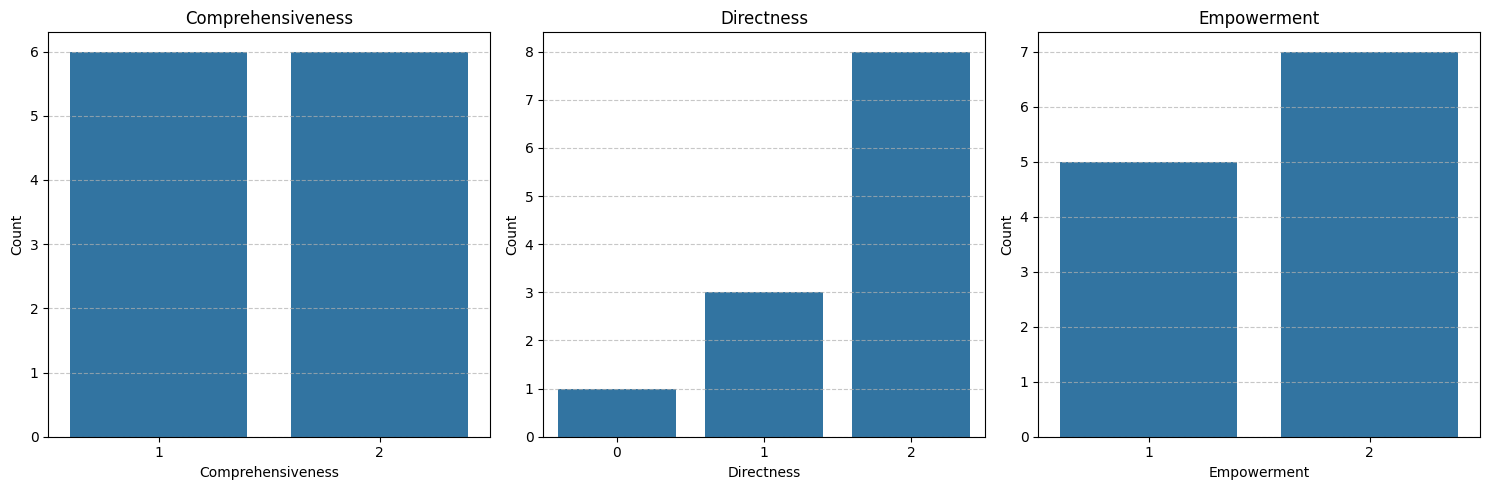

In [80]:
# prompt: plot the distribution of the comprehensiveness	directness	empowerment metrics in answer_df

import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['comprehensiveness', 'directness', 'empowerment']

plt.figure(figsize=(15, 5))

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=answer_df[metric])
    plt.title(f'{metric.capitalize()}')
    plt.xlabel(metric.capitalize())
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [81]:
answer_df.to_pickle('/content/drive/MyDrive/workshop-ECAI/answer_evaluation/answer_evaluation_prova.pkl')

In [22]:
for question in question_df["Cleaned Questions"].to_list():
  for q in question:
    for criteria in CRITERIA.keys():

      answer1 = "NaiveRAG"
      answer2 = "GraphRAG"

      answer_evaluation_prompt = f"""
      ---Role--
      {answ_eval_ROLE}

      ---Goal--
      Given a question and two answers (Answer 1 and Answer 2), assess which answer is better according to the following measure:
      {criteria}

      {answ_eval_ASSESSMENT}

      {answ_eval_FORMAT}

      ---Question--
      {q}

      ---Answer 1--
      {answer1}
      ---Answer 2--
      {answer2}

      Assess which answer is better according to the following measure:
      {criteria}

      Output:
      """

      print(answer_evaluation_prompt)

      chat_completion = client.chat.completions.create(
          messages=[
              {
                  "role": "user",
                  "content": answer_evaluation_prompt
              }
          ],
          model=MODEL,
      )

      answer = chat_completion.choices[0].message.content


      ---Role--
      
You are a helpful assistant responsible for grading two answers to a question that are provided by two different people.

      
      ---Goal--
      Given a question and two answers (Answer 1 and Answer 2), assess which answer is better according to the following measure:
      comprehensiveness

      
Your assessment should include two parts:
- Winner: either 1 (if Answer 1 is better) and 2 (if Answer 2 is better) or 0 if they are fundamentally similar   and the differences are immaterial.
- Reasoning: a short explanation of why you chose the winner with respect to the measure described above.


      
Format your response as a JSON object with the following structure:
{{
 "winner": <1, 2, or 0>,
 "reasoning": "Answer 1 is better because <your reasoning>."
}}

      
      ---Question--
      How do genetic variants in metabolic pathway genes influence the response to dietary interventions aimed at weight management?

      ---Answer 1--
      NaiveRAG
     